In [1]:
import pandas as pd

오픈 API 호출을 통해 수집되어진 자료를 CSV로 저장하여 데이터 전처리 및 EDA 분석 수행

In [2]:
localurl='April_sensor_data.csv'
try:
    df = pd.read_csv(localurl)
except  OSError as err:
    print("OS error: {0}".format(err))


In [3]:
#관측값(관찰값)
df.head()

,NO,REG_DATE,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2
0,1,2020-04-02 0:00,7.54,6.19,21.6,22.1,1.86,4.16
1,2,2020-04-02 0:01,7.83,6.19,21.6,22.1,1.85,4.15
2,3,2020-04-02 0:02,7.54,6.19,21.6,22.1,1.86,4.20
3,4,2020-04-02 0:03,7.83,6.19,21.5,22.1,1.81,4.17
4,5,2020-04-02 0:04,8.12,6.19,21.6,22.1,1.85,4.20


In [4]:
df.tail()

,NO,REG_DATE,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2
25915,25916,2020-04-19 23:55,4.35,4.35,20.6,42.3,1.76,7.70
25916,25917,2020-04-19 23:56,4.21,4.22,20.6,42.3,1.78,7.69
25917,25918,2020-04-19 23:57,5.07,5.07,20.6,42.3,1.76,7.66
25918,25919,2020-04-19 23:58,3.90,3.90,20.6,42.3,1.77,7.71
25919,25920,2020-04-19 23:59,4.64,4.64,20.6,42.3,1.74,7.70


In [5]:
df.columns

Index(['NO', 'REG_DATE', 'PM2.5', 'PM10.0', 'Temperature', 'Huminity', 'TVOC',
       'CO2'],
      dtype='object')

In [6]:
df.drop('NO', axis=1, inplace=True)

In [7]:
df.columns

Index(['REG_DATE', 'PM2.5', 'PM10.0', 'Temperature', 'Huminity', 'TVOC',
       'CO2'],
      dtype='object')

In [8]:
df = df.rename(columns={'Huminity': 'Humidity', 'PM2.5' :'PM25', 'PM10.0':'PM100'})

In [9]:
df.columns

Index(['REG_DATE', 'PM25', 'PM100', 'Temperature', 'Humidity', 'TVOC', 'CO2'], dtype='object')

데이터 값 살펴보기

In [10]:
df['Temperature'].nlargest(5)

683    25.2
680    25.1
681    25.1
682    25.1
684    25.1
Name: Temperature, dtype: float64

In [11]:
df['Temperature'].min() 

18.1

In [12]:
df['Temperature'].max()

25.2

In [13]:
df.nlargest(5, columns='Temperature')

,REG_DATE,PM25,PM100,Temperature,Humidity,TVOC,CO2
683,2020-04-02 11:23,11.03,12.38,25.2,19.6,2.58,4.49
680,2020-04-02 11:20,10.74,12.38,25.1,19.7,2.63,4.62
681,2020-04-02 11:21,10.16,12.38,25.1,19.5,2.58,4.54
682,2020-04-02 11:22,10.45,12.38,25.1,19.5,2.58,4.46
684,2020-04-02 11:24,11.32,12.38,25.1,19.6,2.55,4.50


In [14]:
df.nsmallest(5, columns='Temperature')

,REG_DATE,PM25,PM100,Temperature,Humidity,TVOC,CO2
10671,2020-04-09 9:51,14.22,12.38,18.1,21.0,1.39,3.22
10672,2020-04-09 9:52,13.35,12.38,18.1,21.1,1.42,3.25
10669,2020-04-09 9:49,15.09,12.38,18.2,20.9,1.38,3.29
10670,2020-04-09 9:50,14.22,12.38,18.2,21.0,1.35,3.22
10673,2020-04-09 9:53,13.06,12.38,18.2,21.1,1.44,3.27


In [15]:
df['Temperature'].nsmallest(3)

10671    18.1
10672    18.1
10669    18.2
Name: Temperature, dtype: float64

In [16]:
df['Temperature'].min()

18.1

In [17]:
df.nsmallest(5, columns='Humidity')

,REG_DATE,PM25,PM100,Temperature,Humidity,TVOC,CO2
5071,2020-04-05 12:31,15.38,18.57,19.5,13.3,1.55,1.92
5072,2020-04-05 12:32,16.54,18.57,19.5,13.4,1.56,1.98
5073,2020-04-05 12:33,15.67,18.57,19.6,13.4,1.53,1.90
5074,2020-04-05 12:34,15.09,12.38,19.6,13.4,1.55,1.98
5070,2020-04-05 12:30,15.67,18.57,19.5,13.5,1.54,1.98


In [18]:
df.nlargest(5, columns='Humidity')

,REG_DATE,PM25,PM100,Temperature,Humidity,TVOC,CO2
25735,2020-04-19 20:55,10.25,10.25,20.7,43.4,1.88,7.95
25736,2020-04-19 20:56,10.01,10.01,20.7,43.4,1.88,7.98
25737,2020-04-19 20:57,9.38,9.38,20.7,43.4,1.86,7.97
25740,2020-04-19 21:00,8.97,8.97,20.7,43.4,1.89,7.92
25741,2020-04-19 21:01,9.67,9.67,20.7,43.4,1.87,7.93


최저습도일 때의 온도값을 얻어옴 


In [19]:
df['Temperature'][df['Humidity']==df['Humidity'].min()]

5071    19.5
Name: Temperature, dtype: float64

최저습도일 때의 행(row)값을 얻어옴

In [20]:
df[df['Humidity']==df['Humidity'].min()]

,REG_DATE,PM25,PM100,Temperature,Humidity,TVOC,CO2
5071,2020-04-05 12:31,15.38,18.57,19.5,13.3,1.55,1.92


최고습도일 때의 행(row)값을 얻어옴

In [21]:
df[df['Humidity']==df['Humidity'].max()].head()

,REG_DATE,PM25,PM100,Temperature,Humidity,TVOC,CO2
25735,2020-04-19 20:55,10.25,10.25,20.7,43.4,1.88,7.95
25736,2020-04-19 20:56,10.01,10.01,20.7,43.4,1.88,7.98
25737,2020-04-19 20:57,9.38,9.38,20.7,43.4,1.86,7.97
25740,2020-04-19 21:00,8.97,8.97,20.7,43.4,1.89,7.92
25741,2020-04-19 21:01,9.67,9.67,20.7,43.4,1.87,7.93


In [22]:
df_temp = df['Temperature']

In [23]:
df_temp.describe()

count    25919.000000
mean        20.248779
std          1.054083
min         18.100000
25%         19.400000
50%         20.200000
75%         20.800000
max         25.200000
Name: Temperature, dtype: float64

In [24]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')

In [25]:
df_1 = df.drop('REG_DATE', axis=1)

In [26]:
#print(df_1['Temperature'].describe().transpose())
# return the transpose 
#result = df_1.transpose() 
  
# Print the result 
#print(result) 

for x in df_1.columns:
    print(df_1[x].describe())

count    25920.000000
mean        13.863554
std          8.075783
min          1.480000
25%          8.700000
50%         12.190000
75%         16.730000
max         74.570000
Name: PM25, dtype: float64
count    25920.000000
mean        13.872682
std          7.598230
min          0.000000
25%          6.587500
50%         12.380000
75%         18.570000
max         61.900000
Name: PM100, dtype: float64
count    25919.000000
mean        20.248779
std          1.054083
min         18.100000
25%         19.400000
50%         20.200000
75%         20.800000
max         25.200000
Name: Temperature, dtype: float64
count    25919.000000
mean        26.715375
std          6.867535
min         13.300000
25%         22.300000
50%         25.500000
75%         30.500000
max         43.400000
Name: Humidity, dtype: float64
count    25919.000000
mean         2.026366
std          0.282825
min          1.100000
25%          1.840000
50%          2.010000
75%          2.160000
max          6.860000


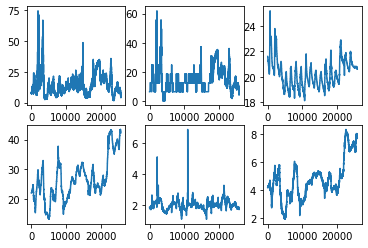

In [27]:
figure, axes = plt.subplots(nrows=2, ncols=3)
x  = list(range(len(df_1['Temperature'])))
axes[0, 0].plot(x, df_1['PM25'])
axes[0, 1].plot(x, df_1['PM100'])
axes[0, 2].plot(x, df_1['Temperature'])
axes[1, 0].plot(x, df_1['Humidity'])
axes[1, 1].plot(x, df_1['TVOC'])
axes[1, 2].plot(x, df_1['CO2'])



Text(0.5, 1.0, 'CO2')

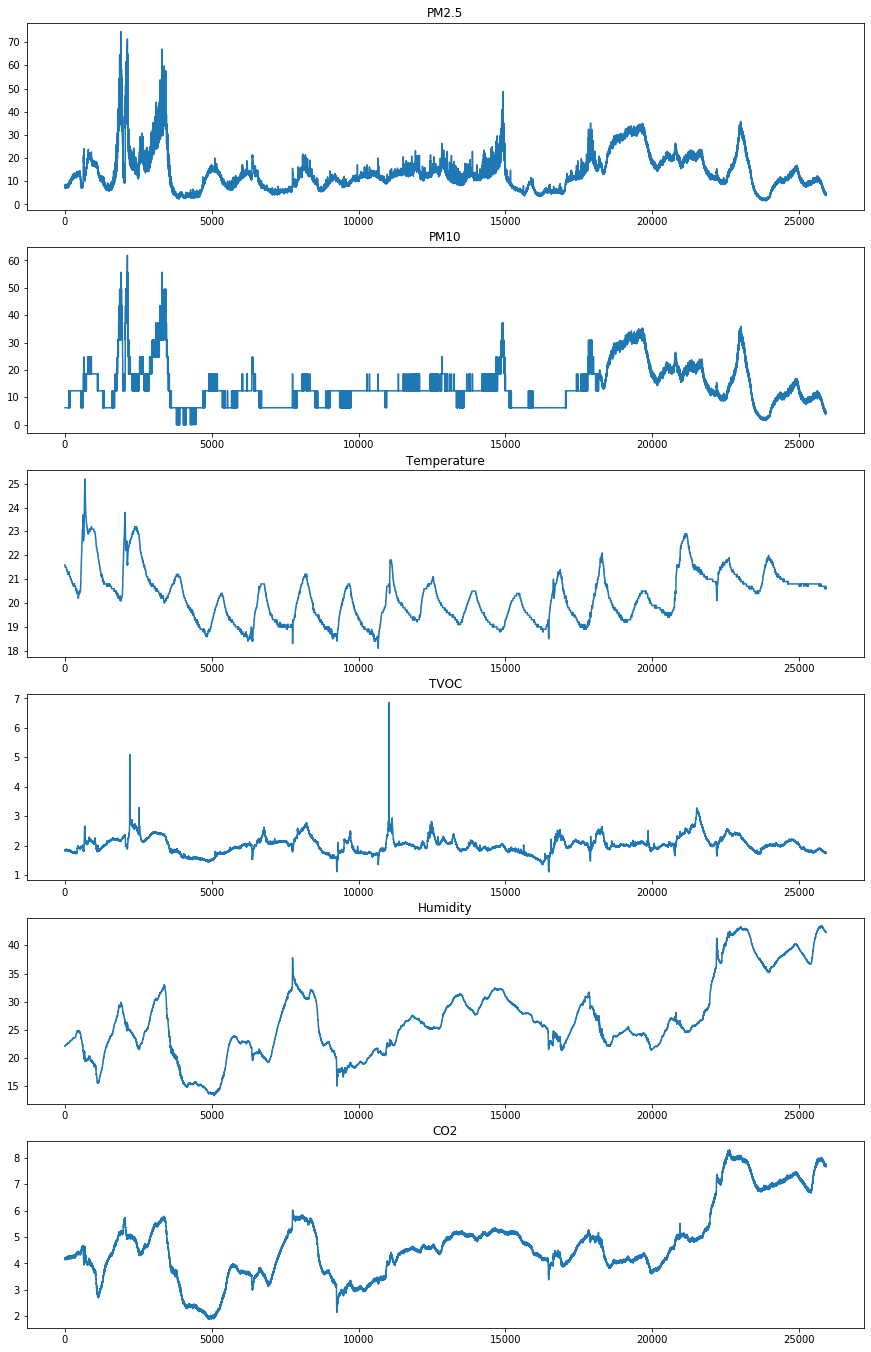

In [28]:
fig, axes = plt.subplots(6,1, figsize=(15,24))
x  = list(range(len(df_1['Temperature'])))
axes[0].plot(x, df_1['PM25'])
axes[0].set_title ('PM2.5')
axes[1].plot(x, df_1['PM100'])
axes[1].set_title ('PM10')
axes[2].plot(x, df_1['Temperature'])
axes[2].set_title ('Temperature')

axes[4].plot(x, df_1['Humidity'])
axes[4].set_title ('Humidity')

axes[3].plot(x, df_1['TVOC'])
axes[3].set_title ('TVOC')
axes[5].plot(x, df_1['CO2'])
axes[5].set_title ('CO2')

In [29]:
pd.DataFrame({'S1': df_1['PM25'], 'S2': df_1['PM100'], 'S3': df_1['Temperature'], 'S4': df_1['Humidity'], 'S5':df_1['TVOC'], 'S6' :df_1['CO2'] }).corr()

,S1,S2,S3,S4,S5,S6
S1,1.000000,0.978462,0.126186,0.086916,0.355466,0.106732
S2,0.978462,1.000000,0.121493,0.071399,0.346467,0.091029
S3,0.126186,0.121493,1.000000,0.179200,0.549721,0.369453
S4,0.086916,0.071399,0.179200,1.000000,0.250780,0.978920
S5,0.355466,0.346467,0.549721,0.250780,1.000000,0.349379
S6,0.106732,0.091029,0.369453,0.978920,0.349379,1.000000


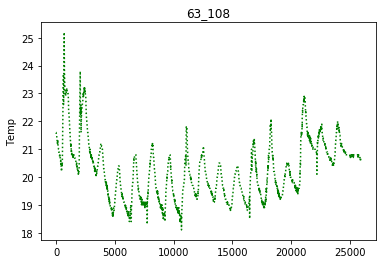

In [30]:
plt.plot(x, df_temp, ':b', color='g')
plt.xlim(0, 5)
plt.ylim(15, 50);
plt.axis('tight');
plt.title("63_108")
plt.ylabel("Temp");

plt.show()

In [31]:
df_temp.describe()

count    25919.000000
mean        20.248779
std          1.054083
min         18.100000
25%         19.400000
50%         20.200000
75%         20.800000
max         25.200000
Name: Temperature, dtype: float64

In [32]:
def z_score(df):
    return ((df - df.mean())/df.std(ddof=0))

In [33]:
z_score(df_temp)

0        1.281917
1        1.281917
2        1.281917
3        1.187046
4        1.281917
5        1.187046
6        1.187046
7        1.187046
8        1.187046
9        1.187046
10       1.187046
11       1.187046
12       1.187046
13       1.187046
14       1.187046
15       1.187046
16       1.187046
17       1.187046
18       1.187046
19       1.187046
20       1.187046
21       1.187046
22       1.187046
23       1.187046
24       1.187046
25       1.187046
26       1.187046
27       1.187046
28       1.187046
29       1.187046
           ...   
25890    0.333207
25891    0.333207
25892    0.333207
25893    0.333207
25894    0.333207
25895    0.333207
25896    0.333207
25897    0.333207
25898    0.333207
25899    0.333207
25900    0.333207
25901    0.333207
25902    0.333207
25903    0.333207
25904    0.333207
25905    0.333207
25906    0.333207
25907    0.333207
25908    0.333207
25909    0.333207
25910    0.333207
25911    0.428078
25912    0.428078
25913    0.428078
25914    0

In [34]:
import matplotlib.pyplot as plt
def plot_zscore(df):
    x = list(range(len(df_temp)))
    y = z_score(df_temp)
    plt.plot(x, y, ':b', color='g')
    plt.plot(x, df_temp, ':b', color='r')
    plt.show()

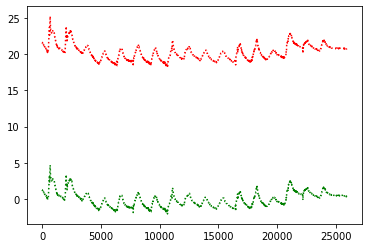

In [35]:
plot_zscore(df_temp)